# Time series prediction (Part 1 - 1 day)

Python 3.9

**Ressource** 

https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python#12.-Difference-between-white-noise-and-a-stationary-series-

https://www.statsmodels.org/stable/user-guide.html#time-series-analysis

https://alkaline-ml.com/pmdarima/modules/classes.html

**NB objective**
- [ ] Get to know the theory behind time series
- [ ] Discover main time series analysis challenges

**Required librairies**
- [ ] matplotlib
- [ ] numpy
- [ ] pandas
- [ ] seaborn
- [ ] pmdarima
- JUPYTER

## Tips time-series

**Dataset splitting** = TRES important, différent de d'habitude

on split en fenetre de période le dataset entre train/test 

attention taille de fenetre intègre aussi le cycle et les patterns = si on prédit un phénomène annuel il faut a minima prendre une fenetre annuelle 

au départ on prend que 2 fenetres (train/test) apres en cross val on en prend plusieurs 

par rapport à avant : le train et test font la meme taille

## How to deal with Time series ?

To be brief, when dealing with time series, few checks are required and for your greatest pleasure... a bit of theory helps... 
😁

### Theory

#### Tendancy and seasonality

In [ ]:
# Add a small resume for tendancy, seasonality residue
# What is additive decomposition?

- **Tendancy**

the trend of the time-series, up , down or horizontal

- **Seasonality**

cyclic pattern in the time-series with similar timing, direction and magnitude, different from **cyclical component** which doesn't exhibit repetition over a specific period

- **irregular variation** 

error, events that are not cyclic and impredictable, +/- random

- **Additive decomposition**

based on the hypothesis that time-series data is a sum of its components : error + trend + seasonality

=ETS Decomposition 

#### Autocorrelation partial or not


**Autocorrelation** is simply the correlation of a series with its own lags. If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

**Partial Autocorrelation** also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.


In [ ]:
# Explain the following fonction

$ p(h) = corr(Y_t, Y_t-_h) $

Y value at t is correlated to Y value at t-h, with h the lag in time

#### Stationarity

In [ ]:
# Resume conditions for a time serie to be considered as stationary

- **Stationarity**

It shows the mean value of the series that remains constant over the time period. If past effects accumulate and the values increase towards infinity then stationarity is not met.

Conditions : 

- values independant of time
- mean, var, autocorrelation = constant over time
- independant of seasonal effect 

Transform data to stationnary :

- Differencing the Series (once or more)
- Take the log of the series
- Take the nth root of the series
- Combination of the above



#### Heteroskedasticity

In [ ]:
# Explain and resume conditions for a time series to be heteroskedastic
# Why is it important to test heteroskedasticity before any regression analysis?

**Heteroskedasticity**

variable variance over time, the dispersion of the values change over time 

the opposite is **homoskedasticity**

- Changes in variance are problematic for forecasting. It impacts the fitting of an adequate model, thereby affecting forecasting performance.

Heteroskedasticity detection :

- White test;
- Breusch-Pagan test;
- Goldfeld–Quandt test

**Ressource** :

https://towardsdatascience.com/how-to-detect-heteroskedasticity-in-time-series-3413a8aa8da9

## Time series analysis

**Data analysis**

|N°|Task|Status|Comment|
|---|-----|---------|----|
|1|Write code to visualize, describe and eventually clean data|Done||
|2|Write code to assess autocorrelation and stationarity |Done||
|3|Write code to test the heteroskedasticity|Done||
|4|Write code to change sampling (D/M/Y)|Done |NaN generation for day sampling|
|5|Write definitions|Done||

In [1]:
#Lib and config
import pmdarima as pm 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

In [2]:
# Load data
from pmdarima.datasets import load_airpassengers
# Write definitions to visualize, describe and eventually clean data
# Write definition to assess autocorrelation and stationarity 
# Write definition to test the heteroskedasticity
# Write definition to change sampling (D/M/Y)
data = load_airpassengers(as_series=True)

**Task 1**

Write definitions to visualize, describe and eventually clean data

The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.


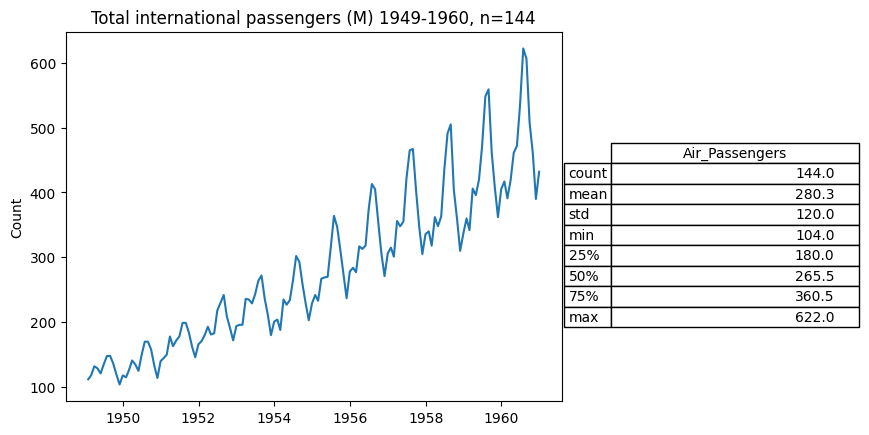

In [3]:
dataset_definition = 'The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.'

print("Visualize, describe and clean data\n")
print(dataset_definition, "\n")
length_dataset= len(data)

data_set_description = pd.DataFrame(load_airpassengers(True).describe()).set_axis(labels=['Air_Passengers'], axis=1)

#Plot data
sns.lineplot(data).set(title=f'Total international passengers (M) 1949-1960, n={length_dataset}',
                       ylabel="Count")

#Data description
table = plt.table(cellText=data_set_description.values.round(1),
                  rowLabels=data_set_description.index,
                  colLabels=data_set_description.columns,
                  bbox=(1.1, .2, 0.5, 0.5))

plt.show()

**Task 2**

Write definition to assess autocorrelation and stationarity 


In [105]:
# data

In [5]:
#autocorrelation
# pm.utils.acf(x=data.values, nlags=12) #autocorrelation sur 12 mois car données mensuelles? => on loupe la dimension annuelle nan ? 
# sns.lineplot(pm.utils.acf(x=data.values, nlags=144)).set(title='Autocorrelation plot', xlabel='Lag value')
#tous les 12 mois ça remonte donc janv-janv sont corrélés
#la corr diminue + on augmente le lag parce que les années diffèrent de plus en plus
# plt.show()


------------------------------------------------
Autocorrelation analysis
--------------


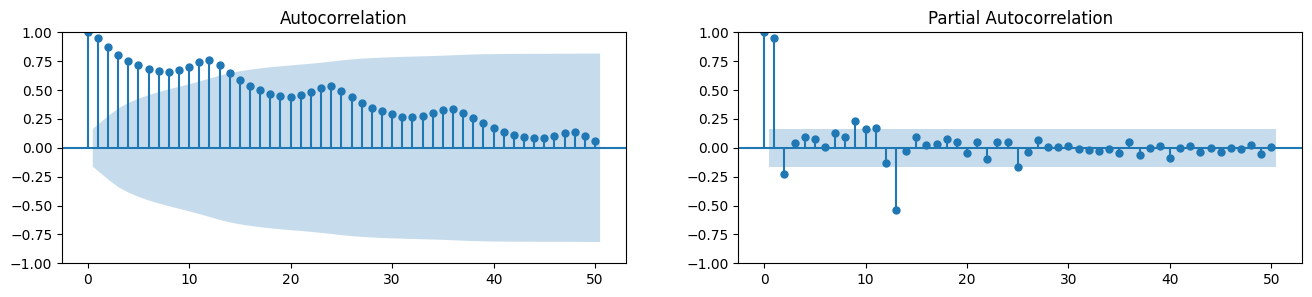

In [6]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print('\n------------------------------------------------')
print("Autocorrelation analysis")
print('--------------')

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(data.values.tolist(), lags=50, ax=axes[0])
plot_pacf(data.values.tolist(), lags=50, ax=axes[1])
plt.show()

In [7]:
from pmdarima.arima import ADFTest, KPSSTest, PPTest

#stationarity
print('\n------------------------------------------------')
print('Stationarity analysis')

#1) check the data : done before

#2) compute summary statistics for dataset splits => if different then not stationary
print('--------------')
print('> Summary statistics for dataset splits')
#Data description
data_split_1 = data[:72]
data_split_2 = data[72:]
data_split_description = pd.concat([data_split_1.describe(), data_split_2.describe()], axis=1).set_axis(labels=['Split 1', "Split 2"], axis=1)
#Table formatting
data_split_description.style \
  .format(precision=1, thousands="", decimal=".") \
  .format_index(str.upper, axis=1) 
#Table display
display(data_split_description)

#3)Augmented Dickey Fuller test (ADF Test)
print('--------------')
print('> Augmented Dickey Fuller test (ADF Test):\n')
pval, is_stationary = ADFTest(alpha=0.05, k=None).should_diff(data)
print( "Stationarity :", is_stationary, ", p-value :", pval)

#4)Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
print('\n--------------')
print('> Kwiatkowski-Phillips-Schmidt-Shin - KPSS test (trend stationary)\n')
pval, is_trend = KPSSTest(alpha=0.05, null='level', lshort=True).should_diff(data)
is_stationary=not is_trend
print( "Has a trend :", is_trend, ", p-value :", pval)

#5)Philips Perron test (PP Test)
print('\n--------------')
print('> Philips Perron test (PP Test)\n')
pval, is_stationary = PPTest(alpha=0.05,  lshort=True).should_diff(data)
print( "Stationarity :", is_stationary, ", p-value :", pval)


------------------------------------------------
Stationarity analysis
--------------
> Summary statistics for dataset splits


,Split 1,Split 2
count,72.000000,72.000000
mean,182.902778,377.694444
std,47.704241,86.439206
min,104.000000,233.000000
25%,144.000000,314.500000
50%,180.000000,361.000000
75%,220.250000,420.500000
max,302.000000,622.000000


--------------
> Augmented Dickey Fuller test (ADF Test):

Stationarity : False , p-value : 0.01

--------------
> Kwiatkowski-Phillips-Schmidt-Shin - KPSS test (trend stationary)

Has a trend : True , p-value : 0.01

--------------
> Philips Perron test (PP Test)

Stationarity : False , p-value : 0.01


**Task 3** heteroskedasticity

In [15]:
from statsmodels.tsa.stattools import breakvar_heteroskedasticity_test
print('\n------------------------------------------------')
print('Heteroskedasticity evaluation')

test_stat, pval = breakvar_heteroskedasticity_test(data.values)
heteroskedasticity = ["True" if pval <0.05 else "False"]
print(f'\n Heteroskedasticity : {heteroskedasticity[0]}, statistic : {round(test_stat,2)}, p-value : {pval}')



------------------------------------------------
Heteroskedasticity evaluation

 Heteroskedasticity : True, statistic : 6.77, p-value : 6.72732172873823e-10


**Task 4** change sampling D/M/Y

In [25]:
data_year_mean = data.resample('1YE').sum()

data_day_mean = data.resample("1D").sum()

data_day_mean

1949-01-31    112.0
1949-02-01      0.0
1949-02-02      0.0
1949-02-03      0.0
1949-02-04      0.0
              ...  
1960-12-27      0.0
1960-12-28      0.0
1960-12-29      0.0
1960-12-30      0.0
1960-12-31    432.0
Freq: D, Length: 4353, dtype: float64

**Task 5** create def

In [7]:
#Lib and config
import pmdarima as pm 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

from pmdarima.datasets import load_airpassengers

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima import ADFTest, KPSSTest, PPTest

from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import breakvar_heteroskedasticity_test


#Functions
def visu_describe_clean(dataset, dataset_definition, plot_title, plot_ylabel):
    print("Visualize, describe and clean data\n")
    print(dataset_definition, "\n")

    data_set_description = pd.DataFrame(dataset.describe()).set_axis(labels=['Summary'], axis=1)
    #Plot data
    sns.lineplot(dataset).set(title=plot_title,
                        ylabel=plot_ylabel)
    #Data description
    table = plt.table(cellText=data_set_description.values.round(1),
                    rowLabels=data_set_description.index,
                    colLabels=data_set_description.columns,
                    bbox=(1.1, .2, 0.5, 0.5))
    plt.show()


def autocorrelation_and_stationarity(dataset):
    print('\n------------------------------------------------')
    print("Autocorrelation analysis")
    print('--------------')
    # Draw Plot
    fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
    plot_acf(dataset.values.tolist(), lags=50, ax=axes[0])
    plot_pacf(dataset.values.tolist(), lags=50, ax=axes[1])
    plt.show()
    print('\n------------------------------------------------')
    print('Stationarity analysis')
    #1) check the data : done before
    #2) compute summary statistics for dataset splits => if different then not stationary
    print('--------------')
    print('> Summary statistics for dataset splits')
    #Data description
    split = int(len(dataset)/2)
    data_split_1 = data[:split]
    data_split_2 = data[split:]
    data_split_description = pd.concat([data_split_1.describe(), data_split_2.describe()], axis=1).set_axis(labels=['Split 1', "Split 2"], axis=1)
    #Table formatting
    data_split_description.style \
    .format(precision=1, thousands="", decimal=".") \
    .format_index(str.upper, axis=1) 
    #Table display
    display(data_split_description)

    #3)Augmented Dickey Fuller test (ADF Test)
    print('--------------')
    print('> Augmented Dickey Fuller test (ADF Test):\n')
    pval, is_stationary = ADFTest(alpha=0.05, k=None).should_diff(dataset)
    print( "Stationarity :", is_stationary, ", p-value :", pval)

    #4)Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)
    print('\n--------------')
    print('> Kwiatkowski-Phillips-Schmidt-Shin - KPSS test (trend stationary)\n')
    pval, is_trend = KPSSTest(alpha=0.05, null='level', lshort=True).should_diff(dataset)
    is_stationary=not is_trend
    print( "Has a trend :", is_trend, ", p-value :", pval)

    #5)Philips Perron test (PP Test)
    print('\n--------------')
    print('> Philips Perron test (PP Test)\n')
    pval, is_stationary = PPTest(alpha=0.05,  lshort=True).should_diff(dataset)
    print( "Stationarity :", is_stationary, ", p-value :", pval)

def heteroskedasticity_check(dataset):
    print('\n------------------------------------------------')
    print('Heteroskedasticity evaluation')
    print('--------------')

    #fit simple linear model
    data_for_olsr = dataset.reset_index().set_axis(labels=['time', 'value'], axis=1)
    olsr = ols('value ~ time', data_for_olsr).fit()

    #test heteroskedasticity
    test_stat, pval = breakvar_heteroskedasticity_test(olsr.resid)
    heteroskedasticity = ["True" if pval <0.05 else "False"]
    print(f'\n Heteroskedasticity : {heteroskedasticity[0]}, statistic : {round(test_stat,2)}, p-value : {pval}')

def change_sampling(dataset, sampling_list):
    data_new_list=[]
    for i in range(len(sampling_list)):
        data_new = dataset.resample(sampling_list[i]).sum()
        data_new_list.append(data_new)
    return data_new_list

Visualize, describe and clean data

The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960. 



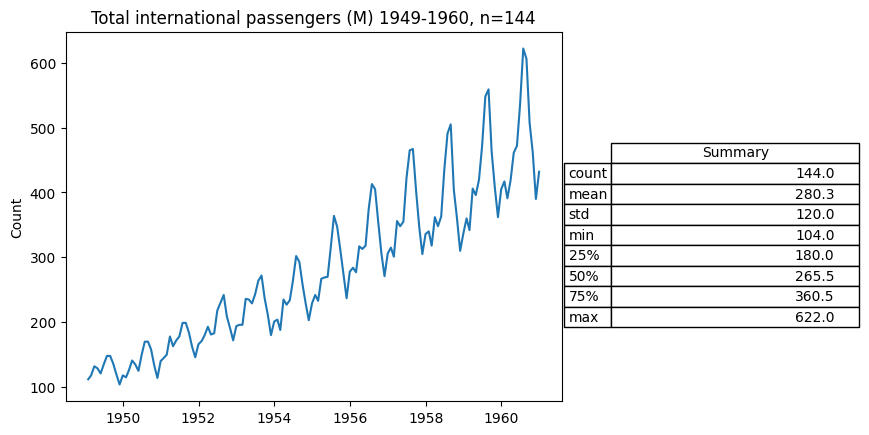


------------------------------------------------
Autocorrelation analysis
--------------


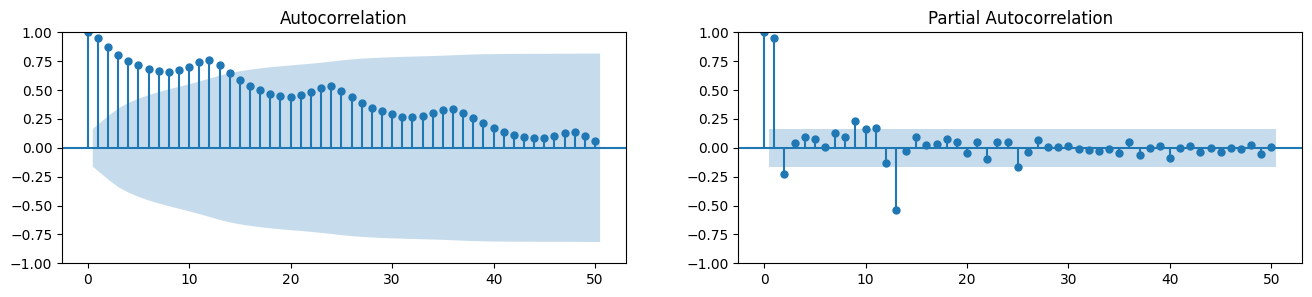


------------------------------------------------
Stationarity analysis
--------------
> Summary statistics for dataset splits


,Split 1,Split 2
count,72.000000,72.000000
mean,182.902778,377.694444
std,47.704241,86.439206
min,104.000000,233.000000
25%,144.000000,314.500000
50%,180.000000,361.000000
75%,220.250000,420.500000
max,302.000000,622.000000


--------------
> Augmented Dickey Fuller test (ADF Test):

Stationarity : False , p-value : 0.01

--------------
> Kwiatkowski-Phillips-Schmidt-Shin - KPSS test (trend stationary)

Has a trend : True , p-value : 0.01

--------------
> Philips Perron test (PP Test)

Stationarity : False , p-value : 0.01

------------------------------------------------
Heteroskedasticity evaluation
--------------

 Heteroskedasticity : True, statistic : 0.04, p-value : 1.035173182206094e-22


In [8]:
#Dataset Load and index creation
data = load_airpassengers(as_series=True)    
length_dataset= len(data)
data_index = pd.date_range("1949-01-01", periods=length_dataset, freq="ME")
data.index = data_index

#Informations about the dataset
#Task 1
dataset_definition_val = 'The classic Box & Jenkins airline data. Monthly totals of international airline passengers, 1949 to 1960.'
plot_title_val=f'Total international passengers (M) 1949-1960, n={length_dataset}'
plot_ylabel_val="Count"
visu_describe_clean(data, dataset_definition_val, plot_title_val, plot_ylabel_val)

#Task2
autocorrelation_and_stationarity(data)

#Task3
heteroskedasticity_check(data)

#Task4

data_resampled = change_sampling(data, ['1YE', '1D'])
data_year = data_resampled[0]
data_day = data_resampled[1]


## Automatization (optionnal when ex finished on day1)

**TODO - Write a class with the following methods:**
* A `check format` method to check format and eventually change it to datetime format
* A `Visualize` method with <span style="color:red"> Plotly</span>
* A `Test_stats` method for each theoretical point seen previously (tendancy, seasonality...)
* A `Report` method to provide a report about observations on your dataset.